In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
df = pd.read_csv("Data.csv")

In [38]:
df.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


**Estadística Descriptiva**

***La estadística descriptiva de las variables estará focalizada y enfocada hacia las preguntas de investigación. Esto con el motivo de explorar mejor el conjunto de datos, quizá puedan surgir nuevas preguntas o incluso ser descartadas las ya existentes.***

***Es importante estar familiarizado con cada variable. es por ello la importancia de la estadística descriptiva. Los gráficos serán análizados y descritos***

**Preguntas de investigación:**

1.	¿Cuál es la probabilidad de encontrar un carro que cueste menos de 1000 dólares?

2.	¿Cuál es el precio de un carro con una confianza del 95%? 


In [39]:
print("Algunos descriptivos sencillos :\n")
print(df["Price"].describe())
k = lambda n : math.ceil(1+np.log2(n))
k = k(len(df))
print("\nTabla de frecuencias: \n")
print(pd.cut(df['Price'], bins=k).value_counts().sort_index())

Algunos descriptivos sencillos :

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

Tabla de frecuencias: 

Price
(4926.002, 8750.9]    35544
(8750.9, 12500.8]     67422
(12500.8, 16250.7]    94751
(16250.7, 20000.6]    89308
(20000.6, 23750.5]    46086
(23750.5, 27500.4]    45900
(27500.4, 31250.3]    38980
(31250.3, 35000.2]    30032
(35000.2, 38750.1]    16570
(38750.1, 42500.0]    11737
(42500.0, 46249.9]     8349
(46249.9, 49999.8]     6199
(49999.8, 53749.7]     2939
(53749.7, 57499.6]     2678
(57499.6, 61249.5]     1529
(61249.5, 64999.4]      764
(64999.4, 68749.3]      395
(68749.3, 72499.2]      369
(72499.2, 76249.1]      219
(76249.1, 79999.0]      229
Name: count, dtype: int64


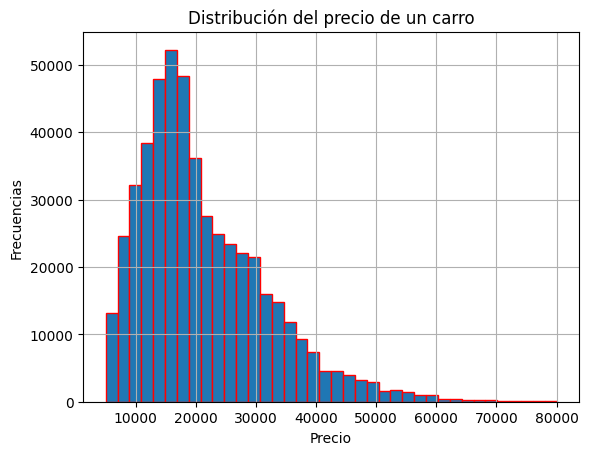

In [40]:
plt.hist(df["Price"], bins=k+18, edgecolor="red")
plt.title("Distribución del precio de un carro")
plt.xlabel("Precio")
plt.ylabel("Frecuencias")
plt.grid(True)
plt.show()

*Descripción:*

El gráfico anterior representa un histograma de la distribución de la variable precio, se puede estimar donde están la media y la moda a simple vista.
Aunque sigue una forma parecida a la campana de Gauss, claramente la distribución no es normal por varias razones.
Aunque más adelante haremos un test de normalidad para aceptar o rechazar la hipotesis nula, con la estadística descriptiva basta para estar seguros de que no es normal:

Veamos algunos estadísticos interesantes: 

In [41]:
moda = stats.mode(df["Price"])
print(f"Moda: {moda}")
media = np.average(df["Price"])
print(f"Media: {media}")
curtosis = stats.kurtosis(df["Price"])
print(f"Curtosis: {curtosis}")
asimetria = stats.skew(df["Price"])
print(f"Asimetria: {asimetria}")

Moda: ModeResult(mode=14995, count=2870)
Media: 21144.186304
Curtosis: 1.7768759481899759
Asimetria: 1.190717187779939


**Del gráfico anterior y de los estadísticos podemos afirmar que la distribucion de la variable precio no es normal, ya que:**
1. La media y la moda no son iguales, nisiquiera están cerca de serlo. De hecho, la media es mucho mayor que la moda, lo que significa que en la distribución va a estar a la derecha de la moda. Por tanto la distribución sigue una asimetría positiva.
2. Tanto la curtosis como la asimetría son positivos, lo que significa que la distrubución es leptocúrtica y presenta asimetría positiva. La distribución normal es mesocúrtica y con asimetría 0

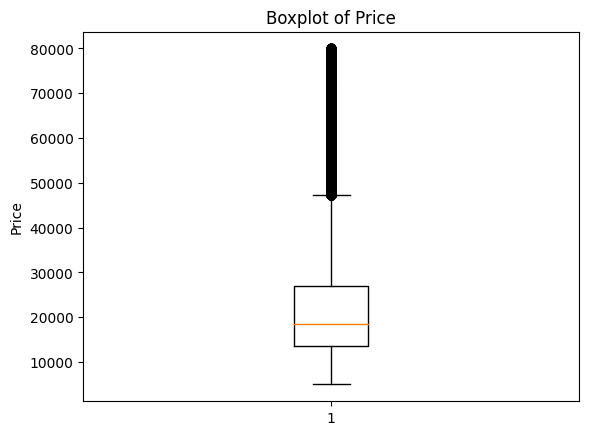

In [42]:
plt.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

El diagrama de caja y bigotes deja ver claramente que existe una gran cantidad de valores átipicos que presenta esta variable. La mediana está cerca al cuartil 1.

**3.	¿Cuál es la probabilidad de encontrar un carro de menos de 5000 dólares y menos de 100.000 KM de recorrido?**

Ya exploramos la variable precio, ahora exploremos la variable millaje

In [43]:
print("Algunos estadísticos sencillos: \n")
print(df["Mileage"].describe())
print("\nTabla de frecuencias: \n")
print(pd.cut(df["Mileage"], bins=k).value_counts().sort_index())

Algunos estadísticos sencillos: 

count    5.000000e+05
mean     5.507643e+04
std      4.089704e+04
min      5.000000e+00
25%      2.585500e+04
50%      4.299000e+04
75%      7.740600e+04
max      2.457832e+06
Name: Mileage, dtype: float64

Tabla de frecuencias: 

Mileage
(-2452.827, 122896.35]     464956
(122896.35, 245787.7]       34369
(245787.7, 368679.05]         606
(368679.05, 491570.4]          40
(491570.4, 614461.75]           6
(614461.75, 737353.1]           6
(737353.1, 860244.45]           5
(860244.45, 983135.8]           2
(983135.8, 1106027.15]          7
(1106027.15, 1228918.5]         0
(1228918.5, 1351809.85]         0
(1351809.85, 1474701.2]         2
(1474701.2, 1597592.55]         0
(1597592.55, 1720483.9]         0
(1720483.9, 1843375.25]         0
(1843375.25, 1966266.6]         0
(1966266.6, 2089157.95]         0
(2089157.95, 2212049.3]         0
(2212049.3, 2334940.65]         0
(2334940.65, 2457832.0]         1
Name: count, dtype: int64


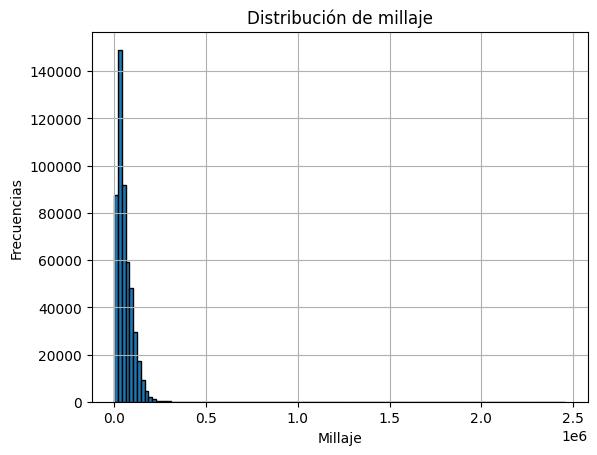

In [44]:
plt.hist(df["Mileage"], bins=k+100, edgecolor="black")
plt.title("Distribución de millaje")
plt.xlabel("Millaje")
plt.ylabel("Frecuencias")
plt.grid(True)
plt.show()

Al igual que la variable precio, la variable millaje también presenta leptocúrtosis y asimetría positiva. Esta vez es mucho más evidente estas caracteristicas de la variable

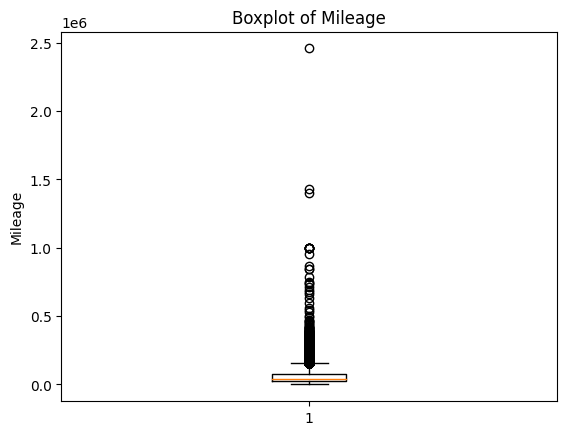

In [45]:
plt.boxplot(df["Mileage"])
plt.title('Boxplot of Mileage')
plt.ylabel('Mileage')
plt.show()

El box plot confirma aún más la distribución de esta variable. Presenta demasiados outliers y la mediana está muy cerca del cuartil 1

**4.	 ¿Cuál es la probabilidad de encontrar un Mercedez de menos de 100000 dólares?**

**5.	¿Con una confianza del 95% cuál es la cantidad de KM de que tiene un Honda?**

Para responder estas preguntas exploremos la variable "Marca" 

In [46]:
print("Frecuencias absolutas")
print(df["Make"].value_counts())
print("\nFrecuencias relativas")
print(df["Make"].value_counts(normalize=True))

Frecuencias absolutas
Make
Ford             78627
Chevrolet        72900
Toyota           57485
Honda            41490
Jeep             30413
GMC              25963
Kia              20347
Dodge            20178
Hyundai          18856
Lexus            17127
BMW              15367
Volkswagen       13876
Nissan           13168
Chrysler         11402
Mercedes-Benz     9497
Subaru            8499
Cadillac          6738
Buick             6132
Ram               4520
MINI              3497
Land              3397
INFINITI          3039
Acura             2990
Mazda             2952
Lincoln           2168
Volvo             2159
Audi              1792
Mitsubishi        1623
Porsche           1200
Scion              800
Jaguar             422
Pontiac            397
FIAT               338
Mercury            325
Tesla              187
Bentley             73
Suzuki              49
Freightliner         7
Name: count, dtype: int64

Frecuencias relativas
Make
Ford             0.157254
Chevrolet        0.

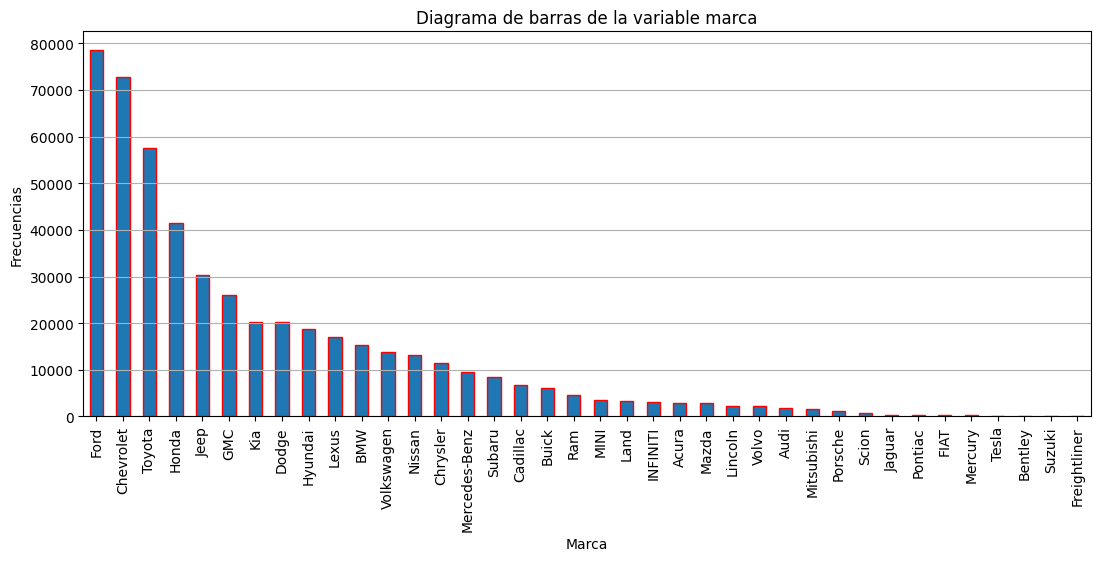

In [47]:
plt.figure(figsize=(13, 5))
df["Make"].value_counts().plot(kind="bar", edgecolor="red")
plt.title("Diagrama de barras de la variable marca")
plt.xlabel("Marca")
plt.ylabel("Frecuencias")
plt.grid(axis="y")
plt.show()

Con respecto a la pregunta, las marcas Honda y Mercedez, no están entre las 3 más comunes marcas entre carros usados. Es interesante ver como Ford y Chevrolet son las marcas más comunes entre los carros usados.

**6.	¿Qué tanto explican las variables Year, Mileage, State, Make y Model la variabilidad del precio de un carro?, ¿Qué tan prospero sería un modelo de regresión lineal?**

Las variables precio, millaje, y marca ya están exploradas y descritas.

Exploremos las faltantes:

Modelo de los carros usados:

In [48]:
print("Estadísticos sencillos: ")
print(df["Model"].describe())
print("\n Tablas de frecuencias: \n")
print(df["Model"].value_counts())
print("\n Tablas de frecuencias relativa: \n")
print(df["Model"].value_counts(normalize=True))

Estadísticos sencillos: 
count        500000
unique          525
top       Silverado
freq          22562
Name: Model, dtype: object

 Tablas de frecuencias: 

Model
Silverado       22562
Grand           15382
Sierra          10423
Accord           9145
F-1504WD         8379
                ...  
Element2WD         69
MuranoS            68
RX-84dr            66
PathfinderSE       66
Monte              65
Name: count, Length: 525, dtype: int64

 Tablas de frecuencias relativa: 

Model
Silverado       0.045124
Grand           0.030764
Sierra          0.020846
Accord          0.018290
F-1504WD        0.016758
                  ...   
Element2WD      0.000138
MuranoS         0.000136
RX-84dr         0.000132
PathfinderSE    0.000132
Monte           0.000130
Name: proportion, Length: 525, dtype: float64


Año de cada carro usado: 

In [49]:
print("Algunos estadísticos sencillos: ")
print(df["Year"].describe())
print("\n Tablas de frecuencias\n")
print("Frecuencias absolutas: ")
print(df["Year"].value_counts())
print("\nFrecuencias relativas:")
df["Year"].value_counts(normalize=True)

Algunos estadísticos sencillos: 
count    500000.000000
mean       2013.197174
std           3.290135
min        1997.000000
25%        2012.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: Year, dtype: float64

 Tablas de frecuencias

Frecuencias absolutas: 
Year
2015    89157
2014    85365
2016    69856
2017    55926
2013    40473
2012    38783
2011    29710
2010    20800
2008    16897
2007    13801
2009    13304
2006     8978
2005     6153
2004     4272
2003     2392
2002     1465
2001      940
2000      593
2018      453
1999      370
1998      195
1997      117
Name: count, dtype: int64

Frecuencias relativas:


Year
2015    0.178314
2014    0.170730
2016    0.139712
2017    0.111852
2013    0.080946
2012    0.077566
2011    0.059420
2010    0.041600
2008    0.033794
2007    0.027602
2009    0.026608
2006    0.017956
2005    0.012306
2004    0.008544
2003    0.004784
2002    0.002930
2001    0.001880
2000    0.001186
2018    0.000906
1999    0.000740
1998    0.000390
1997    0.000234
Name: proportion, dtype: float64

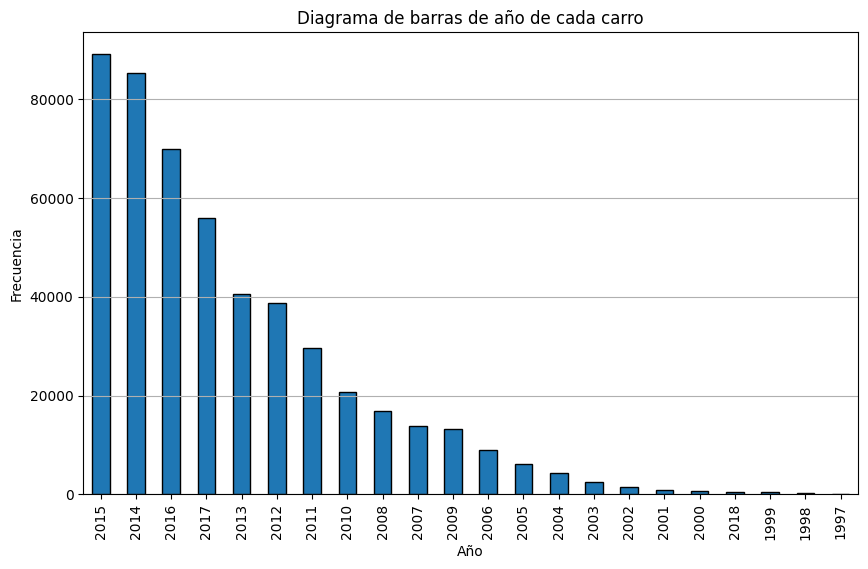

In [50]:
plt.figure(figsize=(10, 6))
df["Year"].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Diagrama de barras de año de cada carro")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.grid(axis="y")
plt.show()

Es interesante ver como los carros de segunda tienden a ser más recientes que antiguos. Se podría concluir que las personas de nuestra muestra, por ahora, tienden a comprar carros y dejar de usarlos en poco tiempo.

In [51]:
print("Estadísticos sencillos: ")
print(df["State"].describe())
print("\n Tablas de frecuencias: \n")
print(df["State"].value_counts())
print("\n Tablas de frecuencias relativa: \n")
print(df["State"].value_counts(normalize=True))

Estadísticos sencillos: 
count     500000
unique        51
top           TX
freq       57153
Name: State, dtype: object

 Tablas de frecuencias: 

State
 TX    57153
 CA    45643
 FL    42244
 GA    22790
 NC    22363
 IL    21058
 VA    19851
 PA    16337
 NY    15617
 NJ    15220
 OH    14171
 CO    13669
 WA    13637
 AZ    13395
 TN    11569
 MA    10753
 MD    10327
 MO     9966
 IN     9833
 KY     8331
 AL     7873
 WI     6950
 MN     6782
 MI     6677
 OK     6374
 CT     6178
 OR     6128
 UT     6095
 SC     6026
 LA     4788
 KS     4621
 NV     4134
 AR     3956
 MS     3843
 NH     3413
 NE     3150
 IA     2910
 NM     2890
 ID     2153
 DE     1520
 HI     1486
 MT     1229
 ME     1197
 RI     1065
 AK     1031
 ND      855
 WV      833
 SD      764
 VT      715
 WY      427
 DC       10
Name: count, dtype: int64

 Tablas de frecuencias relativa: 

State
 TX    0.114306
 CA    0.091286
 FL    0.084488
 GA    0.045580
 NC    0.044726
 IL    0.042116
 VA    0.039702
 PA 

En nuestra muestra, las personas de Texas son las que más compran carros usados.

¿Se podrá generalizar esto para toda la población de estados unidos?, es una pregunta interesante que quizá podría plantear mucho mejor para la otra entrega.

**Veamos algunos gráficos de correlaciones para ver patrones interesantes entre variables:**

**Precio vs Mileage**

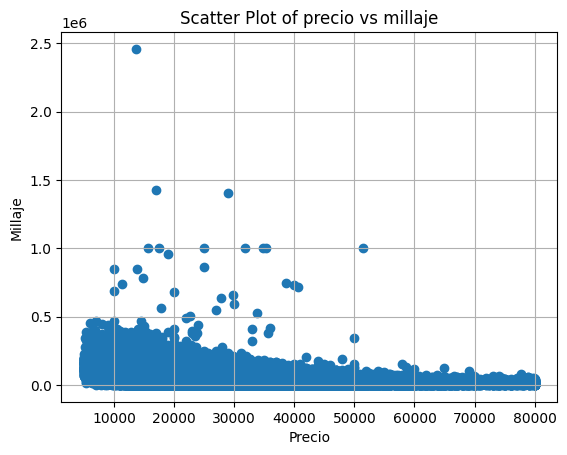

Coeficiente de correalción de Pearson: -0.4702456246490608


In [52]:
plt.scatter(df["Price"], df["Mileage"])
plt.title('Scatter Plot of precio vs millaje')
plt.xlabel("Precio")
plt.ylabel("Millaje")
plt.grid(True)
plt.show()
corrcoef = df["Price"].corr(df["Mileage"])
print(f"Coeficiente de correalción de Pearson: {corrcoef}")

**Precio vs año**

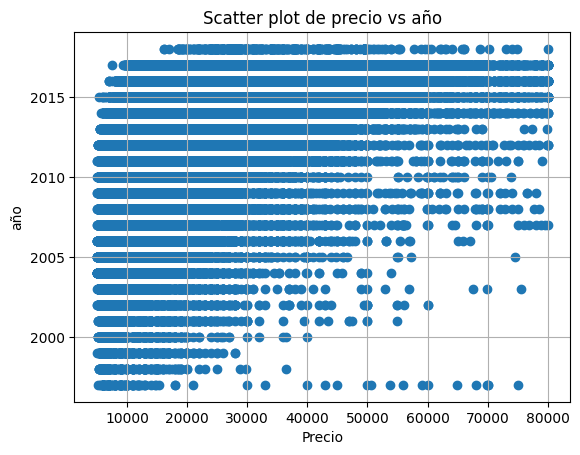

Coeficiente de correlación de Pearson: 0.4798276269131205


In [53]:
plt.scatter(df["Price"], df["Year"])
plt.title("Scatter plot de precio vs año")
plt.xlabel("Precio")
plt.ylabel("año")
plt.grid(True)
plt.show()
corrcoef = df["Price"].corr(df["Year"])
print(f"Coeficiente de correlación de Pearson: {corrcoef}")

Es interesante ver como el precio se correlaciona tan diferente con las variables millaje y año.
1. Pareciera ser que a medida que el millaje es más alto, el precio del carro disminuye. Por tanto, una correalción negativa. De hecho, tiene mucho sentido ya que cuantas más millas de recorrido tenga el auto, más usado estará y por tanto su valor será menor.
2. Con respecto al precio y al año, tiene mucho sentido que la correlación sea positiva, cuanto más reciente es el coche, más características y mejoras nuevas tendrá, como: tecnologias, comodidad, seguridad, estilo, etc ... Por tanto su precio va a subir.

**Test de normalidad de las variables cuantitativas**

Despues de haber hecho la estadistica descriptiva, es evidente que ninguna de las variables cuantitativas sigue una distribución normal. De hecho todas siguen una distribución con asimetría positiva. 

El test de normalidad se hará más adelante cuando veamos tests de normalidad.

**•	Formule y responda dos preguntas, por caso y, en el contexto de los datos, que correspondan a distribuciones muestrales de**

1. Medias
2. Proporciones

1.	Confirmando el teorema del límite central, si tomo muestras “aleatorias” de la variable precio y calculo la media de esas muestras, ¿la distribución de medias será normal?

In [54]:
m = []
for i in range(1000):
    m.append(df["Price"].sample(80).values)

In [55]:
mediasmuestras = []
for i in m:
    mediasmuestras.append(np.mean(i))
print(mediasmuestras)

[21744.6625, 20957.1125, 22640.8375, 19577.9875, 21515.65, 19726.85, 20663.9125, 23832.75, 19793.0125, 19611.2125, 20604.2875, 22812.0125, 19960.9625, 20192.45, 21897.9625, 22005.3, 20754.0875, 22917.55, 22714.6875, 22519.075, 20349.5125, 19289.5625, 22066.35, 20791.9875, 21492.475, 22093.925, 22496.0625, 20967.0, 21026.3125, 21253.7, 19738.2875, 20762.3375, 20524.1625, 19838.4375, 22416.075, 19574.425, 21548.4625, 20984.4375, 21109.3625, 20592.1, 20993.2375, 21244.225, 21929.2875, 20168.5625, 21696.8125, 21658.075, 21789.4875, 19604.975, 21360.8125, 22256.85, 21930.7625, 21962.275, 20898.0375, 22065.3875, 20943.9625, 19999.825, 20957.6625, 21583.65, 22622.9625, 21805.575, 20085.1125, 23593.175, 19781.2375, 21191.825, 18981.025, 20916.5375, 20872.8375, 20282.025, 22431.0875, 21551.7125, 19226.95, 22835.65, 19308.075, 19670.675, 20194.85, 19591.125, 18768.2875, 23133.8375, 19875.7375, 20070.025, 22260.35, 22364.4375, 22901.5, 21563.6875, 20006.025, 20481.0875, 23105.7125, 20015.0625, 21

In [56]:
medias_muestrales = pd.Series(mediasmuestras)

In [57]:
moda = stats.mode(medias_muestrales)
print(f"Moda: {moda}")
media = np.average(medias_muestrales)
print(f"Media: {media}")
curtosis = stats.kurtosis(medias_muestrales)
print(f"Curtosis: {curtosis}")
asimetria = stats.skew(medias_muestrales)
print(f"Asimetria: {asimetria}")

Moda: ModeResult(mode=20163.6375, count=2)
Media: 21212.5664125
Curtosis: -0.07010830925946765
Asimetria: 0.22767187123607532


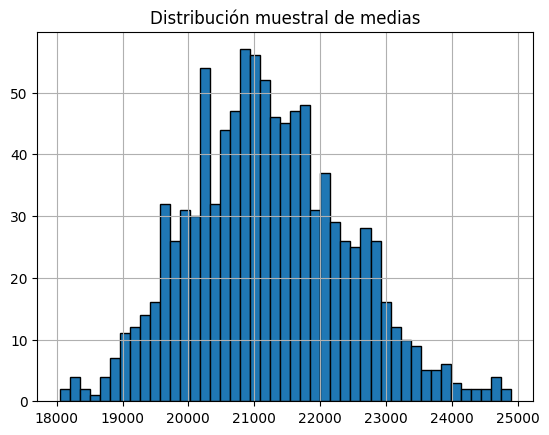

In [58]:
plt.hist(medias_muestrales, bins=k+25, edgecolor="black")
plt.title("Distribución muestral de medias")
plt.grid(True)
plt.show()

*Para el experimento anterior se tomaron 1000 muestras de tamaño 80 de la variable precio, se calcularon sus medias. De esas medias se extrajeron la curtosis y la asimetría, esto con el fin de determinar numericamente si la distribución puede ser normal.*

*Finalmente se graficaron los resultados para confirmar el teorema*

2. ¿Es efectivamente la media de las muestras igual a la media de la población?

In [59]:
media_pob = df["Price"].mean()
print(f"Media de la población: {media_pob}")
media_mue = np.average(medias_muestrales)
print(f"Media de las medias muestrales: {media_mue}")

Media de la población: 21144.186304
Media de las medias muestrales: 21212.5664125


Aunque no son exactamente iguales, vemos que si se acercan demasiado. Por tanto, la media de las medias muestrales será igual a la media de la población

**¿Que hay de la desviación estándar?**

In [60]:
dv_pob = df["Price"].std()
print(f"Desviación de la población: {dv_pob}")
dv_muestra = np.std(medias_muestrales)
print(f"Desvación estándar muestral: {dv_muestra}")

Desviación de la población: 10753.259704000426
Desvación estándar muestral: 1192.3736980865515


Y si aplicamos la formula:
$$ X \sim N(\mu, \frac{\sigma}{\sqrt{n}}) $$


In [61]:
n = 80
raiz_n = n**0.5
print(f"La desviación estándar de la población es: {dv_pob/raiz_n}")

La desviación estándar de la población es: 1202.2509838927108


2. Proporciones

1.	¿Cuál es la Proporción de carros con precio superior a 40000 dólares?

In [62]:
proporcion_superior_umbral = (df["Price"] > 40000).mean()
print(f"Proporción de elementos con precio superior a ${40000}: {proporcion_superior_umbral}")

Proporción de elementos con precio superior a $40000: 0.05767


2. ¿Cuál es la proporción de carros con millaje entre 30000 y 400000? 

In [63]:
millaje_min = 30000
millaje_max = 400000
carros_en_rango = df[(df['Mileage'] >= millaje_min) & (df['Mileage'] <= millaje_max)]
proporcion_carros_en_rango = len(carros_en_rango) / len(df)
print(f"Proporción de carros con millaje entre {millaje_min} y {millaje_max}: {proporcion_carros_en_rango}")

Proporción de carros con millaje entre 30000 y 400000: 0.689758


***Ian Montaño Pardo - Ingeniería en ciencia de datos***